# Data Wrangling Udacity Project
###### Muhammad Ariq Farhansyah Mutyara
## Introduction
This project is part of Udacity Data Analysis Nanodegree Program. Student have to wrangle from real-world twitter user @dog_rates or WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

### Gather

In [1]:
import os
import requests

In [2]:
#downloaded programmatically for image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
import json
import twitter_api as twt
import pandas as pd
import numpy as np
from timeit import default_timer as timer


In [5]:
#downloaded manually for twitter archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
tweet_ids = twitter_archive.tweet_id.tolist()
len(tweet_ids)

2356

In [ ]:
#scrape twitter tweet with tweepy
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = twt.api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except twt.tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
with open('tweet_json.txt', 'r') as f:
    data = [json.loads(line) for line in f]

In [9]:
data[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [10]:
df_list = []
for data_list in data:
    tweet_id = data_list['id']
    retweet_count = data_list['retweet_count']
    favorite_count = data_list['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                    'retweet_count' : retweet_count,
                    'favorite_count' : favorite_count})

In [11]:
twitter_api = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7591,35838
1,892177421306343426,5627,30932
2,891815181378084864,3720,23280
3,891689557279858688,7770,39109
4,891327558926688256,8364,37373


### Assess

In [12]:
#Visual Assessment
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7591,35838
1,892177421306343426,5627,30932
2,891815181378084864,3720,23280
3,891689557279858688,7770,39109
4,891327558926688256,8364,37373
5,891087950875897856,2807,18830
6,890971913173991426,1827,10934
7,890729181411237888,16968,60376
8,890609185150312448,3863,25913
9,890240255349198849,6607,29594


In [15]:
#Programmatic Assessment
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
twitter_archive.source[0] == twitter_archive.source[1]

True

In [19]:
twitter_archive[twitter_archive.source.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [20]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Daisy          7
an             7
Toby           7
Buddy          7
Koda           6
Scout          6
Jax            6
Bella          6
Jack           6
Leo            6
Oscar          6
Milo           6
Stanley        6
Dave           6
Rusty          6
Phil           5
            ... 
Clyde          1
Zooey          1
Bronte         1
Jomathan       1
Brandi         1
Thor           1
Rumpole        1
Fynn           1
Todo           1
Arlen          1
Huck           1
Blue           1
Kial           1
Jennifur       1
Gordon         1
light          1
Ambrose        1
Ronduh         1
Schnitzel      1
Al             1
Brady          1
Timofy         1
Aubie          1
Jeffrie        1
Mabel          1
Dutch          1
Rover          1
Crimson       

In [21]:
twitter_archive[twitter_archive['name'].apply(len) <= 2].name.value_counts()

a     55
Bo     9
an     7
my     1
O      1
Jo     1
Mo     1
by     1
Ed     1
Al     1
JD     1
Name: name, dtype: int64

In [22]:
twitter_archive[twitter_archive['name'] == 'a'].text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [23]:
twitter_archive[twitter_archive['name'] == 'Bo'].text

446     RT @dog_rates: This is Bo. He was a very good ...
449     This is Bo. He was a very good First Doggo. 14...
553     This is Bo. He's going to make me cry. 13/10 p...
583     RT @dog_rates: This is Bo. He's a Benedoop Cum...
679     This is Bo. He's a West Congolese Bugaboop Snu...
686     RT @dog_rates: This is Bo and Ty. Bo eats pape...
876     This is Bo and Ty. Bo eats paper and Ty felt l...
978     This is Bo. He emanates happiness. 12/10 I cou...
1683    This is Bo. He's a Benedoop Cumbersnatch. Seem...
Name: text, dtype: object

In [24]:
twitter_archive[twitter_archive['name'] == 'an'].text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [25]:
twitter_archive[twitter_archive['name'] == 'Mo'].text

393    This is Mo. No one will push him around in the...
Name: text, dtype: object

In [26]:
twitter_archive[twitter_archive['name'] == 'Jo'].text

2219    This is Jo. Jo is a Swedish Queso. Tongue bigg...
Name: text, dtype: object

In [27]:
twitter_archive[twitter_archive['name'] == 'Ed'].text

1988    This is Ed. He's not mad, just disappointed. 1...
Name: text, dtype: object

In [28]:
twitter_archive[twitter_archive['name'] == 'O'].text

775    This is O'Malley. That is how he sleeps. Doesn...
Name: text, dtype: object

In [29]:
twitter_archive[twitter_archive['name'] == 'my'].text

852    This is my dog. Her name is Zoey. She knows I'...
Name: text, dtype: object

In [30]:
twitter_archive[twitter_archive['name'] == 'by'].text

1724    This is by far the most coordinated series of ...
Name: text, dtype: object

In [31]:
twitter_archive.loc[1724, 'text']

'This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE'

In [32]:
twitter_archive[twitter_archive['name'] == 'JD'].text

2041    This is JD (stands for "just dog"). He's like ...
Name: text, dtype: object

In [33]:
twitter_archive[twitter_archive['name'] == 'Al'].text

820    Meet Al Cabone. He's a gangsta puppa. Rather h...
Name: text, dtype: object

In [34]:
twitter_archive[twitter_archive['name'] == 'the'].text

1527    Stop sending in lobsters. This is the final wa...
1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2037    This is the best thing I've ever seen so sprea...
2212    Never forget this vine. You will not stop watc...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [35]:
twitter_archive[twitter_archive['name'] == 'this'].text

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

In [36]:
image_pred[image_pred.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


#### Quality
##### `twitter_archive` table
- in_reply_to_status_id and in_reply_to_user_id column have many null value
- retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp column have many null value
- incorrect data types for timestamp column
- unnecessary duplicated source column
- weird dog name with something like a, an, the, this and more
- some missing value in expanded_urls column

##### `image_pred` table
- there are 66 rows in jpg_url that are duplicated
- p1, p2, p3 should be merged and make it to two columns as dog name and confidence rate
- inconsistent name classification in p1, p2, and p3 sometimes lower case sometimes upper case

#### Tidiness
- doggo, floofer, pupper, puppo should be merged into one column in `twitter_archive` table
- all separated dataframe should be merged into one complete dataframe

### Clean

In [37]:
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
twitter_api = twitter_api.copy()

#### Quality
##### `twitter_archive` table
- **in_reply_to_status_id and in_reply_to_user_id column have many null value**
- **retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp column have many null value**
- **incorrect data types for timestamp column**
- **unnecessary duplicated source column**
- **weird dog name with something like a, an, the, this and more**
- **some missing value in expanded_urls column**

##### Define
- drop in_reply_to_status_id and in_reply_to_user_id column with `drop()` function
- drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp column with `drop()` function
- change timestamp column with `to_datetime()` method
- drop source column with `drop()` function
- change the name with a, an, by, my, JD, the, this to None with pandas assignment, Al to Al Cabone, and O to O'Malley
- change the missing value to None in expanded_urls column with pandas assignment

##### Code

In [38]:
#drop in_reply_status_id and in_reply_to_user_id column with drop() function
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [39]:
#drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp column with drop() function
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp'], axis=1)

In [40]:
#change timestamp column with to_datetime() method
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [41]:
#drop source column with drop() function
twitter_archive_clean = twitter_archive_clean.drop(['source'], axis=1)

In [42]:
#change the name with a, an, by, my, JD, the, this to None with pandas assignment, Al to Al Cabone, and O to O'Malley
name_lsts = ['a', 'an', 'my', 'by', 'JD', 'the', 'this']
for name_lst in name_lsts:
    index = twitter_archive_clean[twitter_archive_clean['name'] == name_lst].index
    twitter_archive_clean.loc[index, 'name'] = 'None'

In [43]:
index = twitter_archive_clean[twitter_archive_clean['name'] == 'Al'].index
twitter_archive_clean.loc[index, 'name'] = 'Al Cabone'

In [44]:
index = twitter_archive_clean[twitter_archive_clean['name'] == 'O'].index
twitter_archive_clean.loc[index, 'name'] = "O'Malley"

In [45]:
#change the missing value to None in expanded_urls column with pandas assignment
index = twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()].index
twitter_archive_clean.loc[index, 'expanded_urls'] = 'None'

##### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.5+ KB


In [47]:
twitter_archive_clean[twitter_archive_clean['name'].apply(len) <= 2].name.value_counts()

Bo    9
Ed    1
Mo    1
Jo    1
Name: name, dtype: int64

##### `image_pred` table
- **there are 66 rows in jpg_url that are duplicated**
- **p1, p2, p3 should be merged and make it to two columns as prediction name and confidence rate**
- **inconsistent name classification in p1, p2, and p3 sometimes lower case sometimes upper case**

##### Define
- drop the row with `drop_duplicates()` method
- make a function with nested if statement to get dog_type and confidence level, if false get None and 0 confidence rate
- make it to lowercase with `str.lower()` method

##### Code

In [48]:
#drop the row with drop_duplicates() method
image_pred_clean = image_pred_clean.drop_duplicates('jpg_url', keep='last')

In [49]:
#make a function with nested if statement to get dog_type and confidence level, if false get None and 0 confidence rate
dog_type = []
conf_rate = []

def get_dog_conf(dataframe):
    if dataframe['p1_dog'] == True:
        dog_type.append(dataframe['p1'])
        conf_rate.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        dog_type.append(dataframe['p2'])
        conf_rate.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        dog_type.append(dataframe['p3'])
        conf_rate.append(dataframe['p3_conf'])
    else:
        dog_type.append('None')
        conf_rate.append(0)

image_pred_clean.apply(get_dog_conf, axis=1)
image_pred_clean['dog_type'] = dog_type
image_pred_clean['conf_rate'] = conf_rate

In [50]:
coll_list = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_pred_clean = image_pred_clean.drop(coll_list, axis=1)

In [51]:
#make it to lowercase with str.lower() method
image_pred_clean['dog_type'] = image_pred_clean['dog_type'].str.lower()

In [52]:
#fix the none value
index = image_pred_clean[image_pred_clean['dog_type'] == 'none'].index
image_pred_clean.loc[index, 'dog_type'] = image_pred_clean.loc[index, 'dog_type'].str.capitalize()

##### Test

In [53]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id     2009 non-null int64
jpg_url      2009 non-null object
dog_type     2009 non-null object
conf_rate    2009 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 158.5+ KB


In [54]:
image_pred_clean.head()

,tweet_id,jpg_url,dog_type,conf_rate
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


#### Tidiness
- doggo, floofer, pupper, puppo should be merged into one column in `twitter_archive` table
- all separated dataframe should be merged into one complete dataframe

##### Define
- merged doggo, floofer, pupper, puppo with `pd.melt()` method
- combine all the dataframe with `pd.merge()` method

##### Code

In [55]:
#merged doggo, floofer, pupper, puppo with pd.melt() method
coll_list = twitter_archive_clean.columns.tolist()
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars=coll_list[:-4], 
                                value_vars=coll_list[-4:], 
                                var_name='dog', 
                                value_name='dog_stage')

In [56]:
twitter_archive_clean = twitter_archive_clean.drop('dog', axis=1)
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep='last')

In [57]:
#combine all the dataframe with pd.merge() method
df_half = pd.merge(twitter_archive_clean, image_pred_clean, how='left', on=['tweet_id'])

In [58]:
df = pd.merge(df_half, twitter_api, how='left', on=['tweet_id'])

In [59]:
#change missing value
index = df[df.jpg_url.isnull()].index
df.loc[index, ['jpg_url', 'dog_type']] = 'None'
df.loc[index, 'conf_rate'] = 0

In [60]:
df = df.dropna()
df = df.reset_index(drop=True)

##### Test

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 13 columns):
tweet_id              2331 non-null int64
timestamp             2331 non-null datetime64[ns]
text                  2331 non-null object
expanded_urls         2331 non-null object
rating_numerator      2331 non-null int64
rating_denominator    2331 non-null int64
name                  2331 non-null object
dog_stage             2331 non-null object
jpg_url               2331 non-null object
dog_type              2331 non-null object
conf_rate             2331 non-null float64
retweet_count         2331 non-null float64
favorite_count        2331 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 236.8+ KB


In [62]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,conf_rate,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,31.0,0.0
1,667550882905632768,2015-11-20 03:51:47,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,None,0.000000,31.0,0.0
2,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,None,0.000000,2112.0,5476.0
3,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,115.0,322.0
4,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,pomeranian,0.412893,493.0,813.0


### Store

In [63]:
df.to_csv('twitter_archive_master.csv', index=False)

### Visualization

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,conf_rate,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,31.0,0.0
1,667550882905632768,2015-11-20 03:51:47,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,None,0.000000,31.0,0.0
2,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,None,0.000000,2112.0,5476.0
3,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,115.0,322.0
4,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,pomeranian,0.412893,493.0,813.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 13 columns):
tweet_id              2331 non-null int64
timestamp             2331 non-null object
text                  2331 non-null object
expanded_urls         2331 non-null object
rating_numerator      2331 non-null int64
rating_denominator    2331 non-null int64
name                  2331 non-null object
dog_stage             2331 non-null object
jpg_url               2331 non-null object
dog_type              2331 non-null object
conf_rate             2331 non-null float64
retweet_count         2331 non-null float64
favorite_count        2331 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 236.8+ KB


#### 1. The 10 Most and Least Average Rated Dog Type

In [66]:
df['rate'] = df['rating_numerator'] / df['rating_denominator']

In [67]:
df[['dog_type', 'rate']].head()

,dog_type,rate
0,vizsla,1.2
1,None,0.5
2,None,0.1
3,toy_poodle,0.9
4,pomeranian,1.0


In [68]:
df_rate_dog = df[df['dog_type'] != 'None'][['dog_type', 'rate']].groupby('dog_type').mean()
df_rate_dog = df_rate_dog.sort_values(by='rate', ascending=False)

In [69]:
df_rate_dog.head(10)

,rate
dog_type,
clumber,2.700000
bouvier_des_flandres,1.300000
saluki,1.250000
pomeranian,1.247619
briard,1.233333
tibetan_mastiff,1.225000
irish_setter,1.220000
border_terrier,1.214286
silky_terrier,1.200000


In [70]:
df_rate_dog.tail(10).sort_values(by='rate', ascending=True)

,rate
dog_type,
japanese_spaniel,0.500000
soft-coated_wheaten_terrier,0.880000
scotch_terrier,0.900000
walker_hound,0.900000
tibetan_terrier,0.925000
dalmatian,0.933333
boston_bull,0.941667
welsh_springer_spaniel,0.950000
maltese_dog,0.952632


#### 2. The 10 Most and Least Average Favorite Dog Type

In [71]:
df_fav_dog = df[df['dog_type'] != 'None'][['dog_type', 'favorite_count']].groupby('dog_type').mean()
df_fav_dog = df_fav_dog.sort_values(by='favorite_count', ascending=False)

In [72]:
df_fav_dog.head(10)

,favorite_count
dog_type,
bedlington_terrier,22773.333333
saluki,22006.750000
french_bulldog,17104.137931
bouvier_des_flandres,16301.000000
black-and-tan_coonhound,15506.500000
flat-coated_retriever,15339.250000
irish_water_spaniel,14832.000000
leonberg,13447.666667
whippet,13366.272727


In [73]:
df_fav_dog.tail(10).sort_values(by='favorite_count', ascending=True)

,favorite_count
dog_type,
brabancon_griffon,797.333333
groenendael,1042.500000
japanese_spaniel,1202.000000
irish_wolfhound,1372.000000
tibetan_terrier,1661.250000
standard_schnauzer,1816.000000
scottish_deerhound,2056.750000
papillon,2242.714286
basenji,2250.777778


#### 3. Is There any Correlation between Retweet and Favorite Count??

In [74]:
df.corr().loc['retweet_count', 'favorite_count']

0.80182325962004564

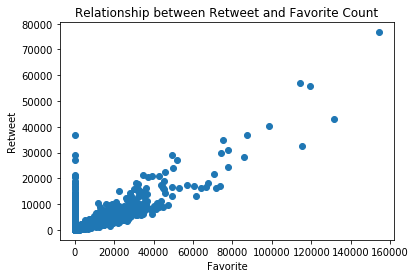

In [85]:
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Relationship between Retweet and Favorite Count')
plt.xlabel('Favorite')
plt.ylabel('Retweet');

#### 4. The 10 Most Common Dog Type

In [81]:
df_dog_type = df[df['dog_type'] != 'None'].dog_type.value_counts()
df_dog_type = df_dog_type[:10]
df_dog_type

golden_retriever      158
labrador_retriever    105
pembroke               94
chihuahua              89
pug                    63
toy_poodle             50
chow                   48
pomeranian             42
samoyed                41
malamute               33
Name: dog_type, dtype: int64

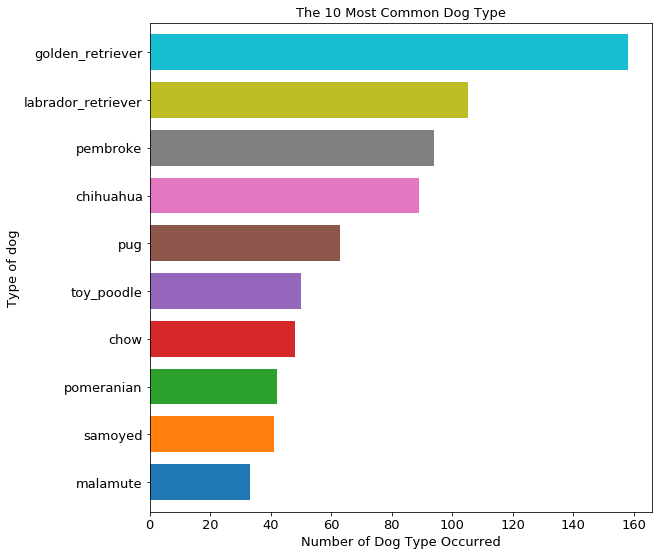

In [86]:
df_dog_type.sort_values(ascending=True).plot.barh(fontsize=13, figsize=(9, 9), width=0.75)
plt.title("The 10 Most Common Dog Type", fontsize=13)
plt.xlabel('Number of Dog Type Occurred', fontsize=13)
plt.ylabel('Type of dog', fontsize=13);